In [2]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt 
from scipy import fftpack,signal
import warnings
warnings.filterwarnings('ignore') # deaktiviert Warnungen
%matplotlib inline

### **Erzeugung der Signale**
+ Parameter:
    + **A: Amplitude**
    + **N: number of samples**
    + **f: Frequenz**
    + **n: variable**
    + **T_s: sample time**
    + **phi: Phasenverschiebung**

#### **Methode 1**

In [2]:
def generate_sinusoid_1(N, A, f, T_s, phi):
    n = np.arange(N)    # [0,1,..., N-1]
    p_n = A * np.sin(2 * f * np.pi * n * T_s + phi) + A
    return p_n

#### **Beispiel 1**

In [3]:
def signal_1(N, A, f, T_s, phi):
    # Gibt die Größe des Bilds an
    plt.figure(figsize = (8,6))
    
    # Initialisieren 
    p_n_1 = generate_sinusoid_1(N, A, f, T_s, phi) 
    n = np.arange(N)
    plt.plot(n, p_n_1, linestyle = '-', linewidth = 2, color='g')
    plt.scatter(n, p_n_1, color='g', s=25, marker='^')
    
    # Gibt die Ausdehnung der Achsen an.
    plt.xlim(0,N), plt.ylim(0,5)
    
    # Die x-Achse nimmt eine nichtlineare Koordinatenachse bzw. die logarithmische Achse an 
    plt.xscale('linear'), plt.yscale('linear')
    
    # Fügt den Achsen Koordinaten hinzu
    plt.xticks([0, 100, 200, 300, 400, 500], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 1, 2, 3, 4, 5], rotation = 0, fontsize = 14, x = -0.01)
    
    # Benennen die Achsen und das gesamte Bild
    plt.ylabel('Druck p', fontsize = 16, labelpad = 15)
    plt.xlabel('Variable n', fontsize = 16, labelpad = 10)
    # plt.title("Signal 1",fontsize = 18, y = -0.2, color = 'b')
    
    # plt.legend(loc = 1,fontsize = 15)
    plt.grid(True)

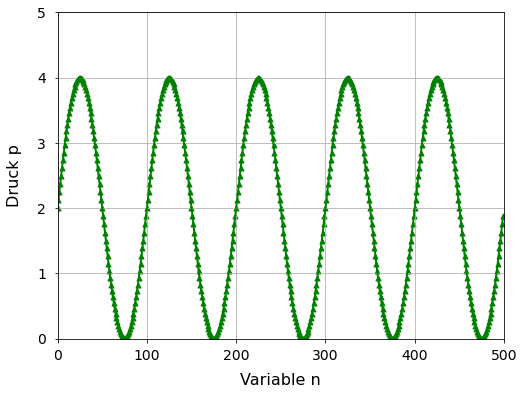

In [4]:
signal_1(500, 2, 1, 0.01, 0)

#### **Methode 2**

In [5]:
def generate_sinusoid_2(N, A):
    n = np.arange(0,N,1)    # [0,1,..., N-1]
    p_n = A * np.sin(2 * np.pi * n / N) + A
    return p_n

#### **Beispiel 2**

In [6]:
def signal_2(N, A):
    plt.figure(figsize = (8,6))
    p_n_2 = generate_sinusoid_2(N, A) 
    n = np.arange(0,N,1)
    # plt.plot(n, p_n_2, linestyle = '-', linewidth = 2, color='g')
    plt.scatter(n, p_n_2, color='r', s=25, marker='o')
    
    plt.xlim(0,N), plt.ylim(0,5), plt.xscale('linear'), plt.yscale('linear')
    plt.xticks([0, 10, 20, 30, 40, 50], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([0, 1, 2, 3, 4, 5], rotation = 0, fontsize = 14, x = -0.01)
    plt.ylabel('Druck p', fontsize = 16, labelpad = 15)
    plt.xlabel('Variable n', fontsize = 16, labelpad = 10)
    # plt.title("Signal 1",fontsize = 18, y = -0.2, color = 'b')
    # plt.legend(loc = 1,fontsize = 15)
    plt.grid(True)

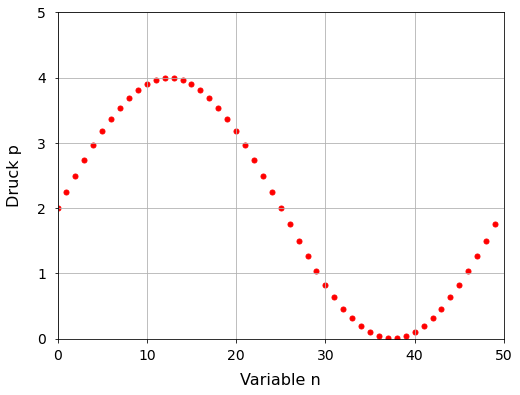

In [7]:
signal_2(50, 2)

#### **Methode 3**
+ **Rechteckschwingung**

In [11]:
def generate_squarewave(N):
    n = np.arange(0,N,1)    # [0,1,..., N-1]
    n_s = np.linspace(start = 0, stop = N, num = N)
    p_n_sw = signal.square(2 * np.pi * 5 * n_s)
    return p_n_sw

In [14]:
def signal_3(N):
    plt.figure(figsize = (8,6))
    p_n_sw = generate_squarewave(N) 
    n = np.arange(0,N,1)
    # plt.plot(n, p_n_2, linestyle = '-', linewidth = 2, color='g')
    plt.scatter(n, p_n_sw, color='r', s=25, marker='o')
    
    plt.xlim(0,N), plt.ylim(-2,2), plt.xscale('linear'), plt.yscale('linear')
    plt.xticks([0, 10, 20, 30, 40, 50], rotation = 0, fontsize = 14, y = -0.01)
    plt.yticks([-2, -1, 0, 1, 2], rotation = 0, fontsize = 14, x = -0.01)
    plt.ylabel('Druck p', fontsize = 16, labelpad = 15)
    plt.xlabel('Variable n', fontsize = 16, labelpad = 10)
    # plt.title("Signal 1",fontsize = 18, y = -0.2, color = 'b')
    # plt.legend(loc = 1,fontsize = 15)
    plt.grid(True)

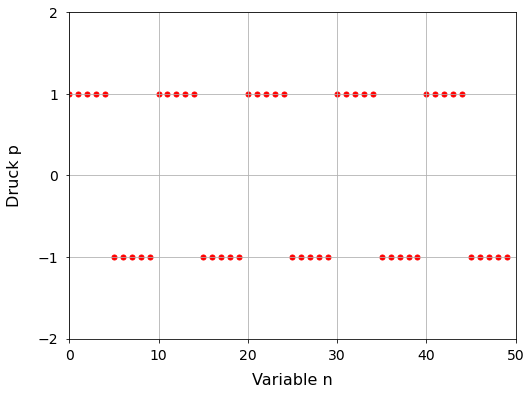

In [15]:
signal_3(50)

#### **DFS: diskrete periodisch im Zeitbereich --> diskrete periodisch im Frequenzbereich**

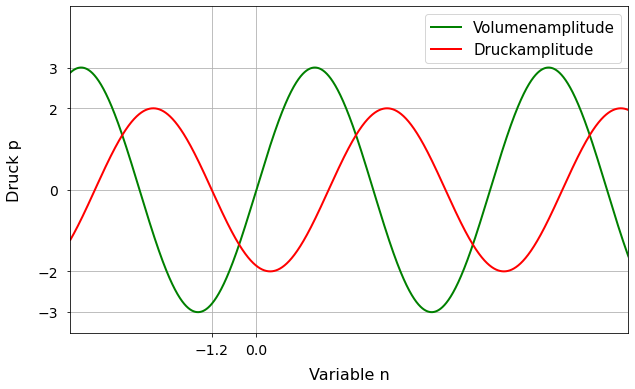

In [38]:
x = np.linspace(-5,10, num = 10000)
y1 = 3 * np.sin(x)
y2 = -2 * np.sin(x+1.2)

plt.figure(figsize = (10,6))
plt.plot(x, y1, label='Volumenamplitude', linestyle = '-', linewidth = 2, color='g',)
plt.plot(x, y2, label='Druckamplitude', linestyle = '-', linewidth = 2, color='r')

plt.xlim(-5,10), plt.ylim(-3.5,4.5), plt.xscale('linear'), plt.yscale('linear')
plt.xticks([-1.2,0], rotation = 0, fontsize = 14, y = -0.01)
plt.yticks([-3,-2,0,2,3], rotation = 0, fontsize = 14, x = -0.01)
plt.ylabel('Druck p', fontsize = 16, labelpad = 15)
plt.xlabel('Variable n', fontsize = 16, labelpad = 10)
# plt.title("Signal 1",fontsize = 18, y = -0.2, color = 'b')
plt.legend(loc = 1,fontsize = 15)
plt.grid(True)

#### **Sampling: diskrete periodisch im Frequenzbereich --> diskrete nicht periodisch im Frequenzbereich**

#### **FS: diskrete nicht periodisch im Frequenzbereich --> kontinuierlich periodisch im Frequenzbereich**